# Diabetes Markov Model: Simulating Patient Outcomes

## 1. Introduction
Simulates diabetes progression using a Markov model with real data from the Kaggle NIDDK dataset, for a university class conference.

## 2. Data Preprocessing
```python
from src.preprocess import load_and_clean_data, define_states, estimate_state_distribution

df = load_and_clean_data("data/diabetes.csv")
df = define_states(df)
print("State Distribution:", estimate_state_distribution(df))

In [38]:
import sys
import os
# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)
print("Project root added to sys.path:", project_root)
print("Updated sys.path:", sys.path)
from src.markov_model import DiabetesMarkovModel, load_transition_matrix

states = ["Controlled", "Uncontrolled", "Severe", "Death"]
transition_matrix = load_transition_matrix("../data/probabilities.csv")  # Correct path
model = DiabetesMarkovModel(transition_matrix, states, n_steps=60)

Project root added to sys.path: d:\Code\python\Markov model in healthcare\Diabetes-Markov-Model
Updated sys.path: ['d:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'd:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'd:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'd:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'd:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'd:\\Code\\python\\Markov model in healthcare\\Diabetes-Markov-Model', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', '', 'C:\\Users\\ADAK\

In [39]:
trajectories, state_counts = model.simulate_cohort(n_patients=1000)
print("Final state distribution:", dict(zip(states, state_counts)))

Final state distribution: {'Controlled': 395, 'Uncontrolled': 178, 'Severe': 311, 'Death': 116}


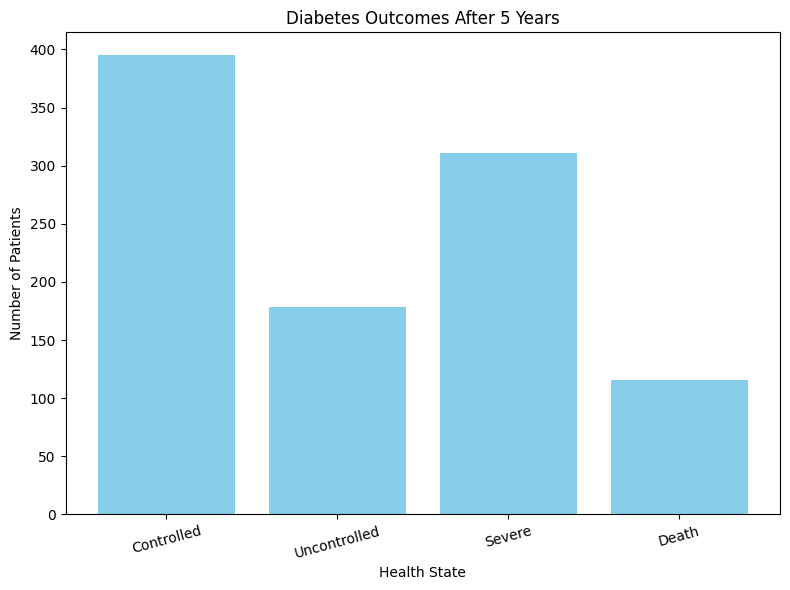

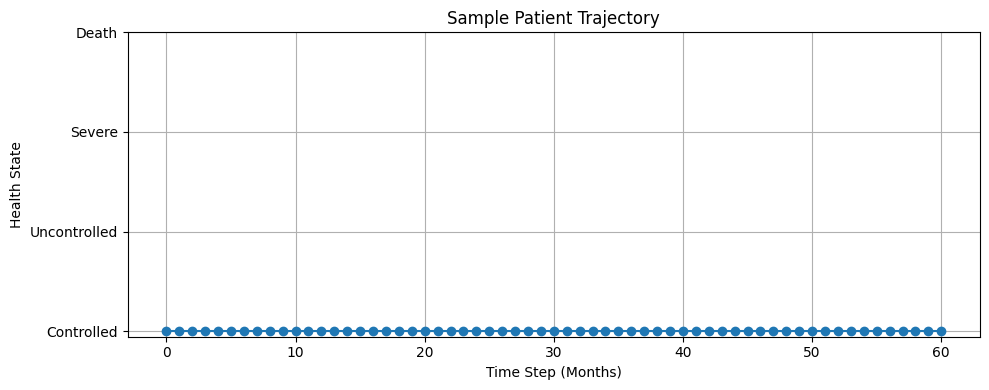

In [40]:
from src.visualize import plot_state_distribution, plot_trajectory

plot_state_distribution(state_counts, states)
plot_trajectory(trajectories[0], states)